# k-nearest neighbors algorithm

k-NN is a non-parametric machine learning method. Its used for regression and classification. 
* in classification the output is a class memebership. An object is classified by vote of it neighbors
* in regression the output is the propery value for the object. This value is teh average of the values of knearest neighbors. 

k-NN is a type of lazy learning, where the function is approximated locally. In this excercise I will show regression and classification. 

In [1]:
#import libraries
#NOTE: for different clustering algoriths I will append libraries before startign the cifferent clustering process
import numpy as np #mathematical operations
import matplotlib.pyplot as plt # plotting library
import warnings # ignore warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from matplotlib.colors import ListedColormap
import seaborn as sns

from pandas import read_csv #read the file with pandas
file = 'Avocado.csv'

In [2]:
#read the file and present first 3 rows
data_raw = read_csv(file)
data_raw.head(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [30]:
#select desired data and its values and transform in matrix = NxM, N being 2 with data x and y and M is the len(x_col.values).
y_col = 'Total Bags'; y = data_raw[y_col].values
x_col = 'Total Volume'; x = data_raw[[x_col]].values
c_map = 'Small Bags'

Text(0.5, 1.0, 'Random dependacy')

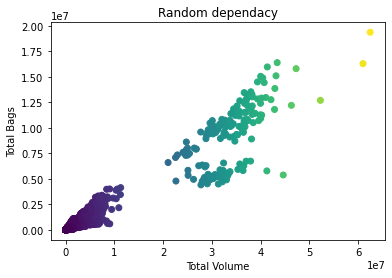

In [31]:
#plot data, so we get the general view of it. 
plt.scatter(x,y, c = x , cmap='viridis')
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title('Random dependacy')

## Neares Neigbors regression

This is used where data labels are continous rather than discrete variables. With this method scikit-learn implements two regressors. Kneighbor Regressor which implements learning based on nearest neighbor. Radius NeighborRegressor implements 
learning based on the neigbor with fixed radius.  

### KNeighborRegressor

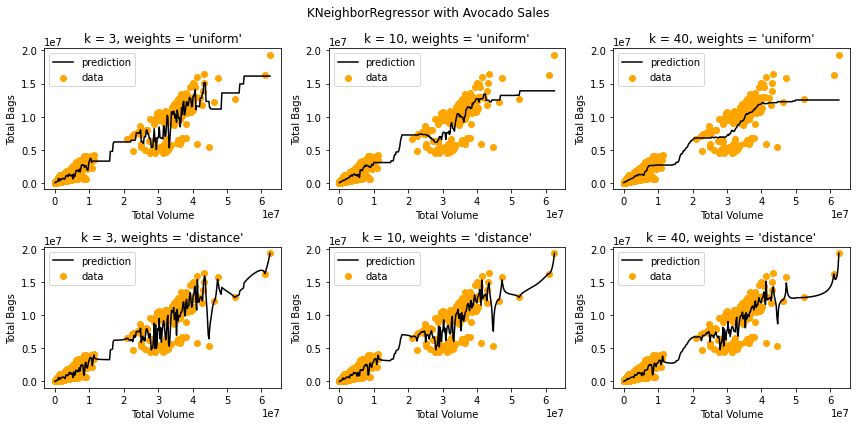

In [50]:
# A list holds the SSE values for each k
from sklearn.neighbors import KNeighborsRegressor
#define neighbors for different examples
neigh = [3, 10, 40, 3,10,40]
fig, axs  = plt.subplots(2, int(len(neigh)/2), figsize=(12,6))
axs = axs.ravel()
X_seq = np.linspace(x.min(),x.max(),300).reshape(-1,1)
for i, j in zip(neigh, range(0, len(neigh))):
    if j < int(len(neigh)/2): 
        weights = 'uniform'
    else: 
        weights = 'distance'
    knn = KNeighborsRegressor(n_neighbors=i, weights=weights)
    model = knn.fit(x,y)
    Y_seq = knn.predict(X_seq)
    axs[j].scatter(x,y, c = 'orange', label = 'data')
    axs[j].plot(X_seq,Y_seq, c = 'black', label = 'prediction')
    axs[j].set_xlabel(x_col)
    axs[j].set_ylabel(y_col)
    axs[j].legend()
    axs[j].set_title("k = %s, weights = '%s'" %(i, weights))
fig.suptitle('KNeighborRegressor with Avocado Sales')
fig.tight_layout()

## RadiusNeighborsRegressor

Like we said this is regression on based neighbour within a fixed radius. We used such a large raidus because we have a sparsed data and small radiuses don't return any significant values. From that we concluded that this method is not so appropripriate, all though we get a similiar results from its sister method KNR.

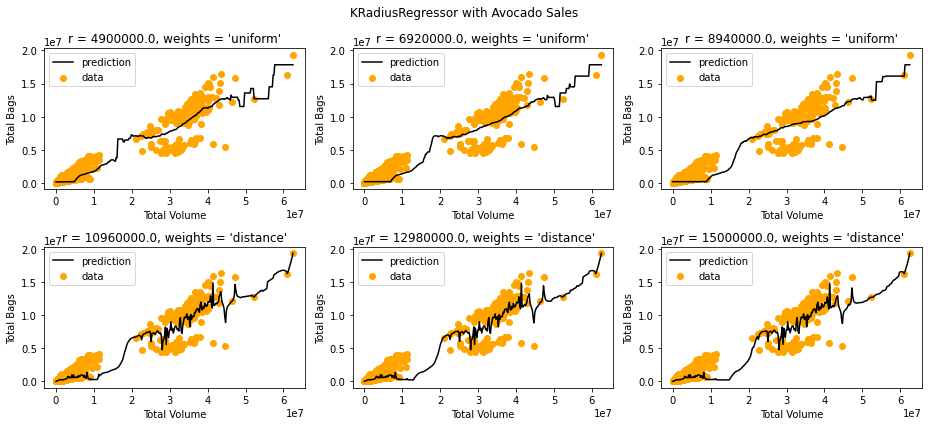

In [49]:
from sklearn.neighbors import RadiusNeighborsRegressor
radius = np.linspace(4.9e6, 1.5e7, 6) # radius. Lower radius doesn't find neighbors. 
fig, axs  = plt.subplots(2, int(len(radius)/2), figsize=(13,6))
axs = axs.ravel()
X_seq = np.linspace(x.min(),x.max(),300).reshape(-1,1)
for i, j in zip(radius, range(0, len(radius))):
    if j < int(len(radius)/2): 
        weights = 'uniform' 
    else: 
        weights = 'distance' 
    rnr = RadiusNeighborsRegressor(radius=i, weights = weights)
    model = rnr.fit(x,y)
    Y_seq = rnr.predict(X_seq)
    axs[j].scatter(x,y, c = 'orange', label = 'data')
    axs[j].plot(X_seq,Y_seq, c = 'black', label = 'prediction')
    axs[j].set_xlabel(x_col)
    axs[j].set_ylabel(y_col)
    axs[j].legend()
    axs[j].set_title("r = %s, weights = '%s'" %(i, weights))
fig.suptitle('KRadiusRegressor with Avocado Sales')
fig.tight_layout()

## Nearest Neigbors classification

Nearest Neighbors classification is a type of instance-based learning or non-generalizing learning. The point is that it does not attempt to construct a general internal model, but simply stores instances of the training data. Again i implment Kneighbors classifier and RadiusNeigbors classifier. The point is basically the same. 

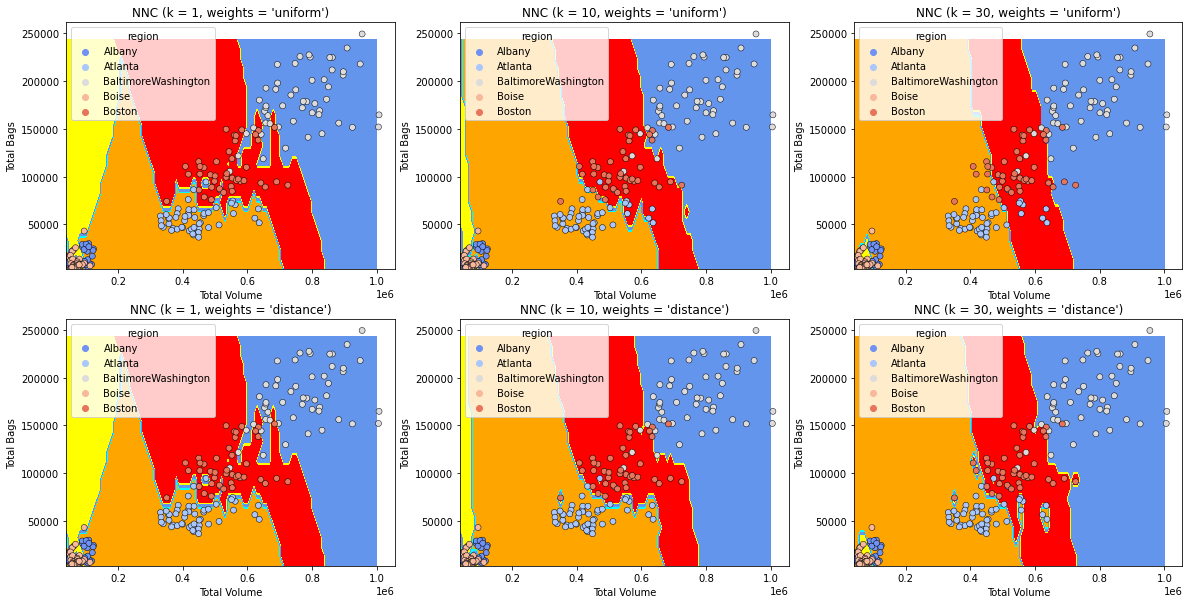

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder


lab_enc = LabelEncoder()


y_col = 'Total Bags'; y = data_raw[y_col].values
x_col = 'Total Volume'; x = data_raw[[x_col]].values   
data_new = data_raw[data_raw[y_col] != 0]
data_s = data_new[[x_col, y_col]].values[0:250] #250 data. We have too many regions and if we include every region its a mess. 

region = data_new['region'][0:250]
#set numbers for different regions for a better fit. 
target = lab_enc.fit_transform(region)
#get unique value from targets
c = np.unique(target)
h = 10000  # step size in the mesh
#if we have lower h, or h < 100, we have to use logarithmic values at x_min,x_max, y_min, y_max, 
#otherwise we overload our processor. With higher step size np.log is not necessary.  
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue', 'yellow', 'red']) 
neigh = [1, 10, 30,1, 10, 30]
fig, axs  = plt.subplots(2, int(len(neigh)/2), figsize=(20,10))
axs = axs.ravel()

x_min, x_max = (data_s[:, 0].min() - 1), (data_s[:, 0].max() + 1)
y_min, y_max = (data_s[:, 1].min() - 1), (data_s[:, 1].max() + 1)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
    
for i, j in zip(neigh, range(0, len(neigh))):
    if j < int(len(neigh)/2): 
        weights = 'uniform'
    else: 
        weights = 'distance'
    clf = KNeighborsClassifier(i, weights=weights)
    clf.fit(data_s, target)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axs[j].contourf(xx, yy, Z, cmap=cmap_light)
    sns.scatterplot(x=data_s[:, 0], y=data_s[:, 1],hue = region, ax = axs[j],
                    palette=sns.color_palette('coolwarm', n_colors=len(c)), alpha=1.0, edgecolor="black")
    axs[j].set_xlabel(x_col)
    axs[j].set_ylabel(y_col)
    axs[j].set_title("NNC (k = %i, weights = '%s')" % (i, weights)) 

                 

## Radius Neigbors classification

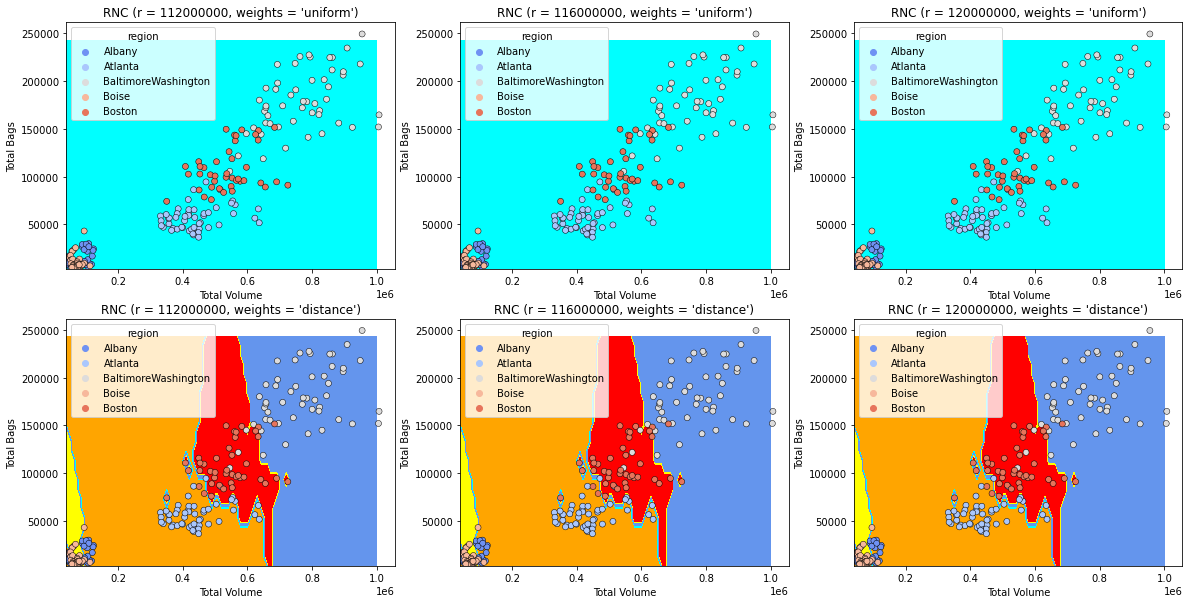

In [47]:
from sklearn.neighbors import RadiusNeighborsClassifier
lab_enc = LabelEncoder()
target = lab_enc.fit_transform(region)
c = np.unique(target)  # step size in the mesh

radius = [112e6, 116e6, 120e6, 112e6, 116e6, 120e6]
fig, axs  = plt.subplots(2, int(len(radius)/2), figsize=(20,10))
axs = axs.ravel()

x_min, x_max = (data_s[:, 0].min() - 1), (data_s[:, 0].max() + 1)
y_min, y_max = (data_s[:, 1].min() - 1), (data_s[:, 1].max() + 1)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue', 'yellow', 'red'])    
for i, j in zip(radius, range(0, len(radius))):
    if j < int(len(neigh)/2): 
        weights = 'uniform'
    else: 
        weights = 'distance'
    clf = RadiusNeighborsClassifier(i, weights=weights)
    clf.fit(data_s, target)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axs[j].contourf(xx, yy, Z, cmap=cmap_light)
    sns.scatterplot(x=data_s[:, 0], y=data_s[:, 1],hue = region, ax = axs[j],
                    palette=sns.color_palette('coolwarm', n_colors=len(c)), alpha=1.0, edgecolor="black")
    axs[j].set_xlabel(x_col)
    axs[j].set_ylabel(y_col)
    axs[j].set_title("RNC (r = %i, weights = '%s')" % (i, weights))

# Conclusion

As we see the regression is good. Doesnt change much between methods. Radius method is more wobbly. With larger radius we see that we have a sparse data with higher numbers, even to 1e6. Thats why we have to use smaller mash sizes if we don't want to transform grid in to logarithmic points. For the classification. The nearest negihbor method works better. As for radius nearest classifier we see that with uniform weight we don't get any results as for RNC we get somehow satisfying results. Code is written in a consistant way, so if you wanna play you just switch the column names. 